# 2D TFIM: Inference (10k samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In this notebook, I loaded the trained models (2D Euclidean RNN, 1D hyperbolic GRU and 1D Euclidean GRU) to generate 10k samples whose local energies are calculated.  The 2D TFIM setting is J=1.0, B=3.0, with 4 square lattice sizes $(N_x, N_y) = (5,5), (7,7), (8,8), (9,9)$. The number of samples used for inference is 10000. 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')

In [2]:
def define_load_test(wf, numsamples, weight_link, Ee):
    test_samples_before = wf.sample(numsamples,2)
    print(f'The number of samples is {len(test_samples_before)}')
    test_gs_before = Ising2D_local_energies(Jz, Bx, Nx, Ny, test_samples_before, wf)
    gs_mean_b = np.round(np.mean(test_gs_before),4)
    gs_var_b = np.round(np.var(test_gs_before),4)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(numsamples, 2)
    test_gs_after =  Ising2D_local_energies(Jz, Bx, Nx, Ny, test_samples_after, wf)
    gs_mean_a = np.round(np.mean(test_gs_after),4)
    gs_var_a = np.round(np.var(test_gs_after),4)
    
    #wf.model.summary()
    #print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')
    print(f'DMRG energy (not exact in 2D) is {np.round(Ee,4)}')

In [3]:
numsamples = 10000

# Nx=5, Ny=5

In [6]:
from tfim2d_1drnn_train_loop import *

2025-11-21 20:49:17.006349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'


/Users/hldao/opt/anaconda3/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.12) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)


In [4]:
Nx=5
Ny = 5
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = numsamples
E_55 = -78.6857

## 1D EuclGRU

In [6]:
print(f'EUCLIDEAN GRU')
t1 = time.time()
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='../results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_55)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -75.2589, var E = 37.0013
After loading weights, the ground state energy mean and variance are:
Mean E = -78.3274, var E = 3.572
DMRG energy (not exact in 2D) is -78.6857
Time taken for inference is 23.664 secs


## 1D HypGRU

In [7]:
t1 = time.time()
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='../results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru, numsamples, wl_hgru, E_55)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -75.6302, var E = 32.3033
After loading weights, the ground state energy mean and variance are:
Mean E = -78.3385, var E = 3.7901
DMRG energy (not exact in 2D) is -78.6857
Time taken for inference is 188.063 secs


## 2D Euclidean RNN

In [8]:
from tfim2d_2drnn_train_loop import *
t1 = time.time()
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='../results/2DRNN_Nx=5_Ny=5_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, numsamples, wl_2d, E_55)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -66.0527, var E = 102.8417
After loading weights, the ground state energy mean and variance are:
Mean E = -78.6554, var E = 0.3227
DMRG energy (not exact in 2D) is -78.6857
Time taken for inference is 18.205 secs


# Nx = 7, Ny = 7

In [9]:
Nx=7
Ny=7
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = numsamples
E_77 = -154.8463

In [10]:
from tfim2d_1drnn_train_loop import *

## 1D EuclGRU

In [11]:
from tfim2d_1drnn_train_loop import *
t1 = time.time()
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='../results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,numsamples, wl_gru, E_77)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -147.5962, var E = 77.9623
After loading weights, the ground state energy mean and variance are:
Mean E = -153.7647, var E = 13.8627
DMRG energy (not exact in 2D) is -154.8463
Time taken for inference is 94.259 secs


## 1D HypGRU

In [12]:
t1 = time.time()
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='../results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru, numsamples, wl_hgru, E_77)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -148.4712, var E = 68.11
After loading weights, the ground state energy mean and variance are:
Mean E = -154.2155, var E = 7.5879
DMRG energy (not exact in 2D) is -154.8463
Time taken for inference is 783.738 secs


## 2D Euclidean RNN

In [13]:
from tfim2d_2drnn_train_loop import *
t1 = time.time()
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='../results/2DRNN_Nx=7_Ny=7_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, numsamples, wl_2d, E_77)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -121.2675, var E = 245.6559
After loading weights, the ground state energy mean and variance are:
Mean E = -154.7942, var E = 0.4958
DMRG energy (not exact in 2D) is -154.8463
Time taken for inference is 63.271 secs


# Nx=8, Ny=8

In [4]:
Nx=8
Ny=8
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = numsamples
E_88 = -202.5077
from tfim2d_1drnn_train_loop import *

2025-11-24 23:16:09.293485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1D EuclGRU

In [6]:
t1 = time.time()
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50, seed = 111)
wl_gru='../results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_svlst_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_88)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -192.7023, var E = 101.8852
After loading weights, the ground state energy mean and variance are:
Mean E = -200.679, var E = 20.266
DMRG energy (not exact in 2D) is -202.5077
Time taken for inference is 126.435 secs


## 1D HypGRU

In [81]:
t1 = time.time()
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_e300p_checkpoint.weights.h5'
define_load_test(wf_hgru,numsamples, wl_hgru, E_88)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -193.1341, var E = 95.7385
After loading weights, the ground state energy mean and variance are:
Mean E = -201.566, var E = 11.3737
DMRG energy (not exact in 2D) is -202.5077
Time taken for inference is 2098.463 secs


In [84]:
#Training done
t1 = time.time()
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_svlst_checkpoint.weights.h5'
define_load_test(wf_hgru,numsamples, wl_hgru, E_88)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -193.1341, var E = 95.7385
After loading weights, the ground state energy mean and variance are:
Mean E = -201.5419, var E = 10.8321
DMRG energy (not exact in 2D) is -202.5077
Time taken for inference is 1950.02 secs


## 2D eRNN

In [17]:
from tfim2d_2drnn_train_loop import *
t1 = time.time()
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='../results/2DRNN_Nx=8_Ny=8_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, numsamples, wl_2d, E_88)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -116.2596, var E = 763.5015
After loading weights, the ground state energy mean and variance are:
Mean E = -202.3941, var E = 1.2891
DMRG energy (not exact in 2D) is -202.5077
Time taken for inference is 109.65 secs


# Nx=9, Ny=9

In [18]:
Nx=9
Ny=9
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = numsamples
E_99 = -256.5535

## 1d EuclGRU

In [19]:
from tfim2d_1drnn_train_loop import *
t1 = time.time()
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='../results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,numsamples, wl_gru, E_99)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -243.9365, var E = 135.456
After loading weights, the ground state energy mean and variance are:
Mean E = -254.0806, var E = 32.5349
DMRG energy (not exact in 2D) is -256.5535
Time taken for inference is 235.901 secs


## 1d HypGRU

In [20]:
from tfim2d_1drnn_train_loop import *
t1 = time.time()
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='../results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru, numsamples, wl_hgru, E_99)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -245.2985, var E = 118.0909
After loading weights, the ground state energy mean and variance are:
Mean E = -254.8021, var E = 22.6555
DMRG energy (not exact in 2D) is -256.5535
Time taken for inference is 1853.916 secs


## 2d Euclidean RNN

In [21]:
from tfim2d_2drnn_train_loop import *
t1 = time.time()
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='../results/2DRNN_Nx=9_Ny=9_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, numsamples, wl_2d, E_99)
t2 = time.time()
print(f'Time taken for inference is {np.round(t2-t1,3)} secs')

The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -196.2633, var E = 453.6727
After loading weights, the ground state energy mean and variance are:
Mean E = -256.4609, var E = 0.9546
DMRG energy (not exact in 2D) is -256.5535
Time taken for inference is 182.369 secs


# Plot convergence curves

In [2]:
#(5,5)
E_55 = -78.68568
mE_egru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_meanE.npy')
mE_hgru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_55 = np.load('../results/2DRNN_Nx=5_Ny=5_u=50_ns50_meanE.npy')
vE_egru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_varE.npy')
vE_hgru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_55 = np.load('../results/2DRNN_Nx=5_Ny=5_u=50_ns50_varE.npy')

#(7,7)
E_77 = -154.84631
mE_egru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_meanE.npy')
mE_hgru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_77 = np.load('../results/2DRNN_Nx=7_Ny=7_u=50_ns50_meanE.npy')
vE_egru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_varE.npy')
vE_hgru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_77 = np.load('../results/2DRNN_Nx=7_Ny=7_u=50_ns50_varE.npy')

#(8,8)
E_88 = -202.5077381
mE_egru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_meanE.npy')
mE_hgru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_88 = np.load('../results/2DRNN_Nx=8_Ny=8_u=50_ns50_meanE.npy')
vE_egru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_varE.npy')
vE_hgru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_88 = np.load('../results/2DRNN_Nx=8_Ny=8_u=50_ns50_varE.npy')

#(9,9)
E_99 = -256.55348
mE_egru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_meanE.npy')
mE_hgru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_99 = np.load('../results/2DRNN_Nx=9_Ny=9_u=50_ns50_meanE.npy')
vE_egru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_varE.npy')
vE_hgru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_99 = np.load('../results/2DRNN_Nx=9_Ny=9_u=50_ns50_varE.npy')

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, e_names, N, frange, legend_loc):
    ax.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_27510/561503945.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('2dTFIM_all_N_ns50_nu50.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


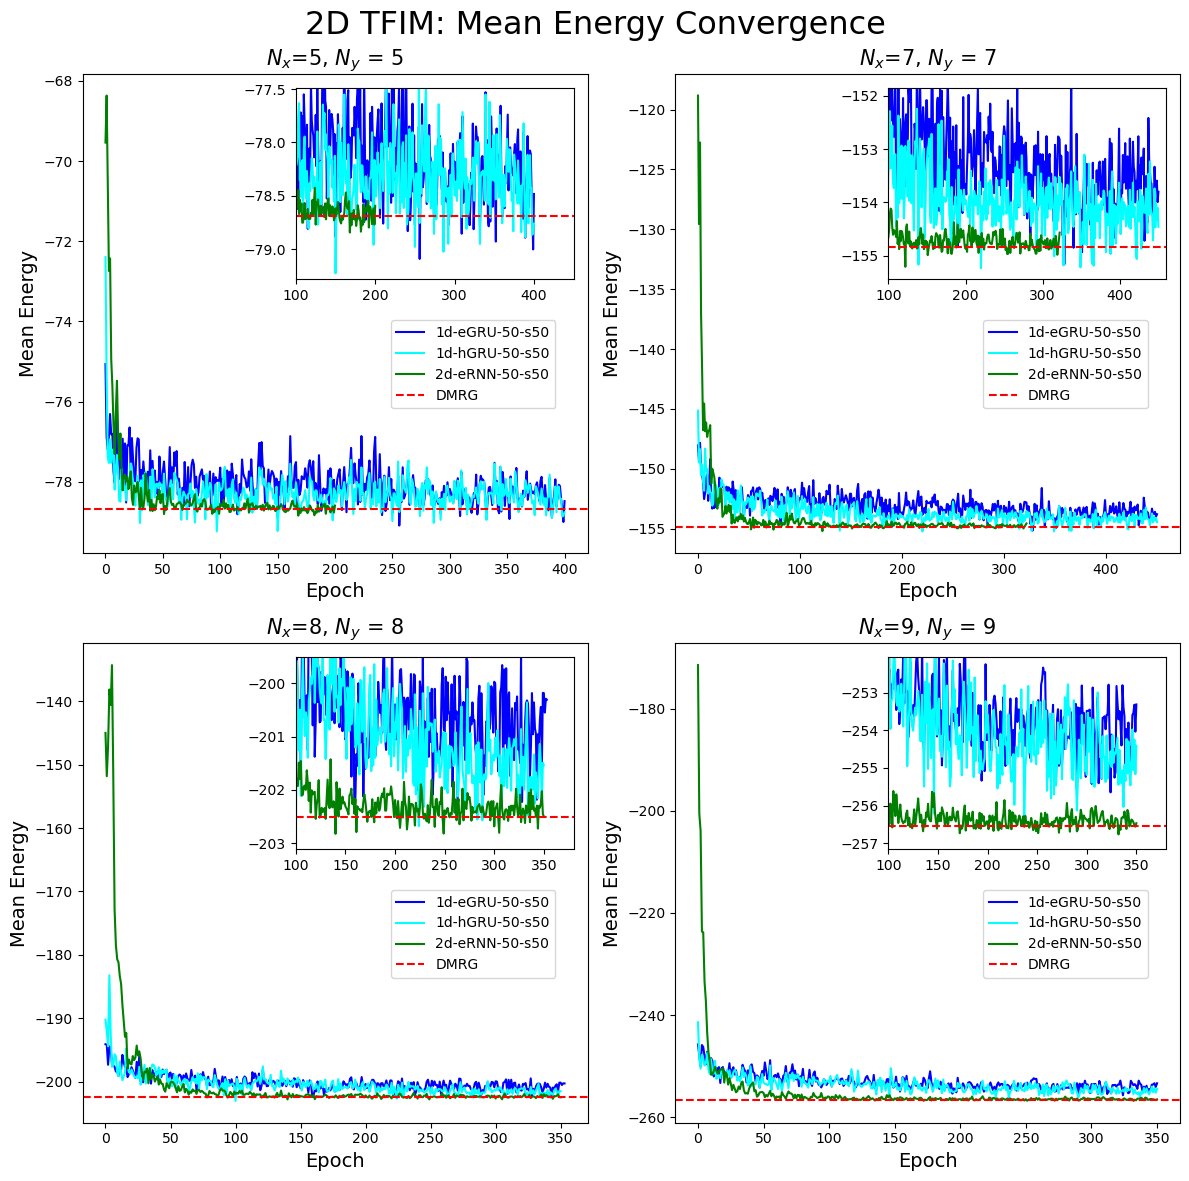

In [4]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [mE_egru_55,  mE_hgru_55, mE_e2gru_55]
e_list77 = [mE_egru_77,  mE_hgru_77, mE_e2gru_77]
e_list88 = [mE_egru_88,  mE_hgru_88, mE_e2gru_88]
e_list99 = [mE_egru_99,  mE_hgru_99, mE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_meanE(ax[0,0], E_55, e_list55, e_names, [5,5], [100,450, E_55-0.6, E_55+1.2], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[0,1], E_77, e_list77, e_names, [7,7], [100,460, E_77-0.6, E_77+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_88, e_list88, e_names, [8,8], [100,380, E_88-0.6, E_88+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_99, e_list99, e_names, [9,9], [100,380, E_99-0.6, E_99+4.5], (0.15, 0.3, 0.8, 0.2))


plt.suptitle('2D TFIM: Mean Energy Convergence', fontsize = 23)
plt.savefig('2dTFIM_all_N_ns50_nu50.png')

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_27510/2514177004.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('2dTFIM_all_N_ns50_nu50_var.png')


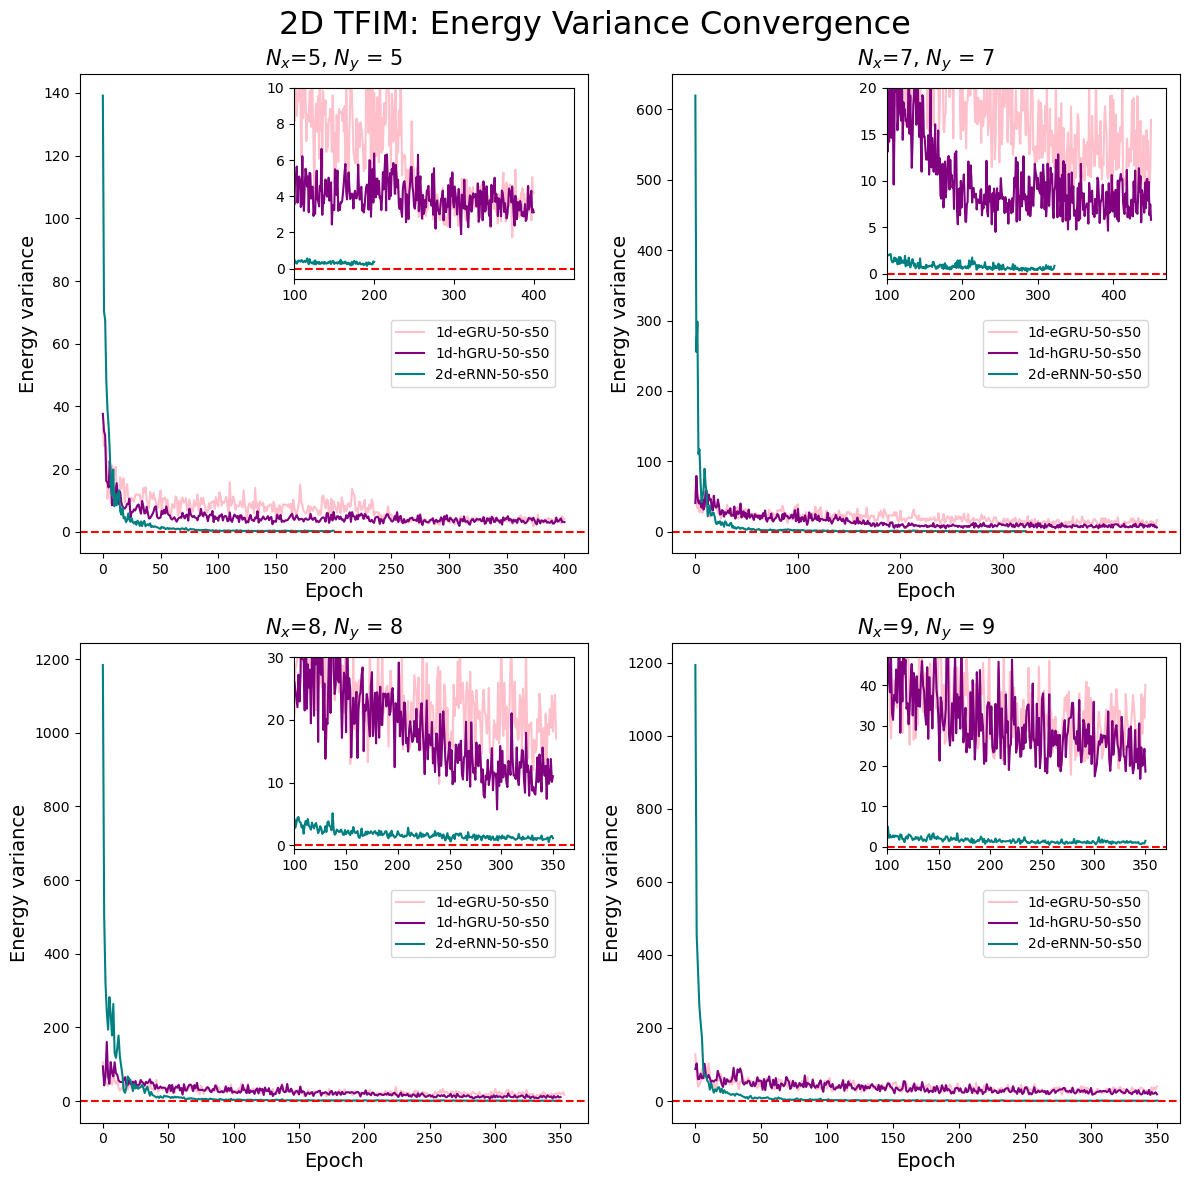

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [vE_egru_55,  vE_hgru_55, vE_e2gru_55]
e_list77 = [vE_egru_77,  vE_hgru_77, vE_e2gru_77]
e_list88 = [vE_egru_88,  vE_hgru_88, vE_e2gru_88]
e_list99 = [vE_egru_99,  vE_hgru_99, vE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_var(ax[0,0], e_list55, e_names, [5,5], [100,450, -0.6, 10.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], e_list77, e_names, [7,7], [100,470, -0.6, 20.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], e_list88, e_names, [8,8], [100,370, -0.6, 30.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], e_list99, e_names, [9,9], [100,370, -0.6, 47.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('2D TFIM: Energy Variance Convergence', fontsize = 23)
plt.savefig('2dTFIM_all_N_ns50_nu50_var.png')